<a href="https://colab.research.google.com/github/meghanardy/CODESOFT/blob/main/MovieRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
m_r_data= pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')


In [3]:
m_r_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
m_r_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
m_r_data.shape

(15509, 10)

In [6]:
m_r_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
m_r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
m_r_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
m_r_data.dropna(inplace= True)

In [10]:
m_r_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
m_r_data.shape

(5659, 10)

In [12]:
m_r_data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


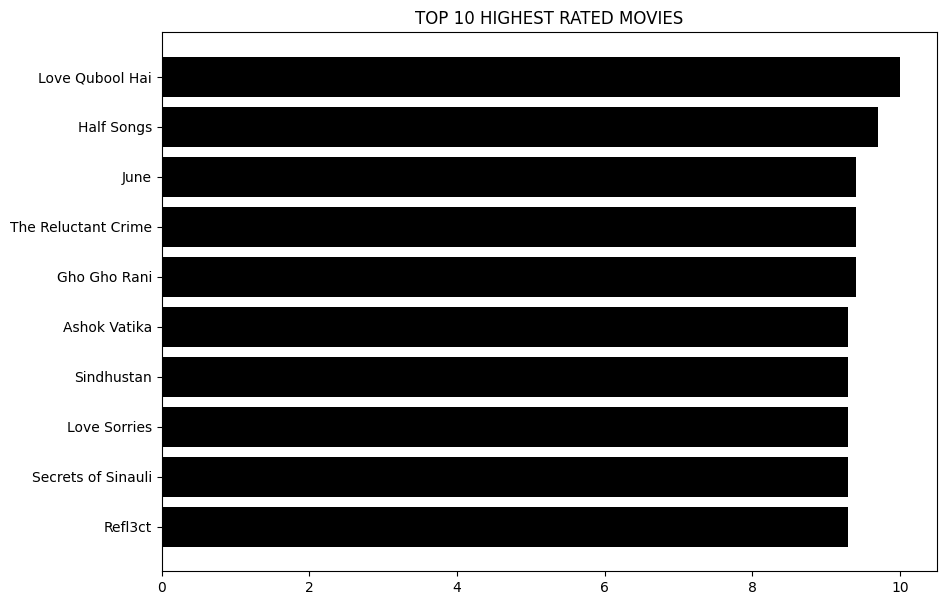

In [13]:
best_rated_movies= m_r_data.sort_values(by ='Rating', ascending= False).head(10)
plt.figure(figsize=(10,7))
plt.barh(best_rated_movies['Name'], best_rated_movies['Rating'], color ='Black')
plt.title('TOP 10 HIGHEST RATED MOVIES')
plt.gca().invert_yaxis()
plt.show()

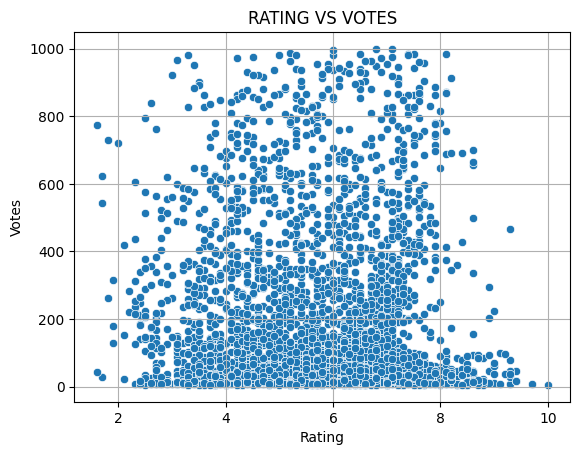

In [14]:
m_r_data['Votes']= pd.to_numeric(m_r_data['Votes'], errors ='coerce')
sns.scatterplot(x= 'Rating', y= 'Votes', data = m_r_data)
plt.title('RATING VS VOTES')
plt.grid(True)
plt.show()

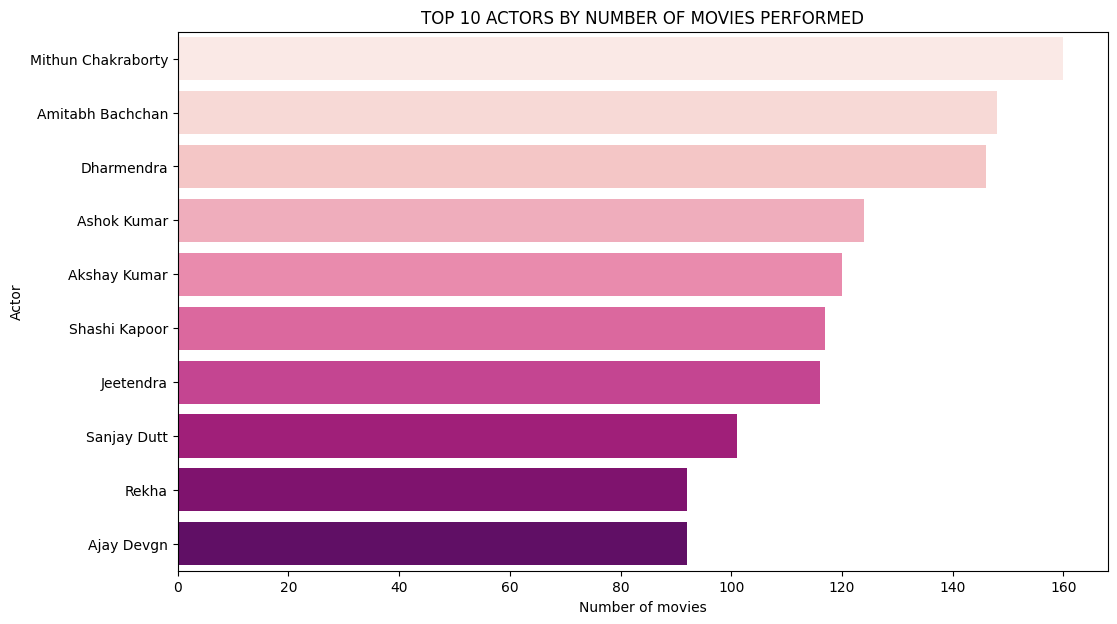

In [15]:
Actors= pd.concat([m_r_data['Actor 1'],m_r_data['Actor 2'],m_r_data['Actor 3']])
Actor_counts = Actors.value_counts().reset_index()
Actor_counts.columns=['Actor','Number of movies']
plt.figure(figsize=(12,7))
sns.barplot(x= 'Number of movies', y= 'Actor', data= Actor_counts.head(10), palette='RdPu')
plt.title('TOP 10 ACTORS BY NUMBER OF MOVIES PERFORMED')
plt.show()

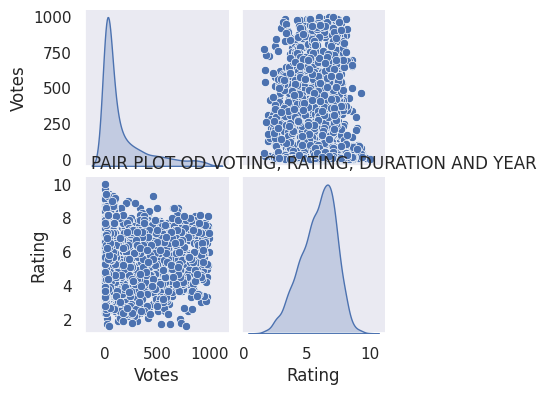

In [16]:
columns_interest= ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style='dark')
sns.pairplot(m_r_data[columns_interest],  diag_kind ='kde', markers ='o', palette ='PuRD', height= 2.0 , aspect= 1.0)
plt.title('PAIR PLOT OD VOTING, RATING, DURATION AND YEAR')
plt.show()

In [17]:
label_encoder = {}
total_factors=['Genre', 'Director', 'Actor 1','Actor 2', 'Actor 3']
for factors in total_factors:
  le = LabelEncoder()
  m_r_data[factors] = le.fit_transform(m_r_data[factors])
  label_encoder[factors] = le

In [18]:
X = m_r_data[['Genre', 'Director', 'Actor 1','Actor 2', 'Actor 3']]
Y = m_r_data['Rating']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=24)

In [20]:
param_grid ={
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3,4,5],
    'subsample': [0,8, 0.9, 1.0]
}

In [21]:
model_xgb= xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model_xgb, param_grid= param_grid, scoring = 'neg_mean_squared_error', cv= 5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0, 8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [22]:
xgb_models= grid_search.best_estimator_

In [23]:
xgb_models.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
Y_pred = xgb_models.predict(X_test)

In [25]:
mean_ab_error = mean_absolute_error(Y_test, Y_pred)
mean_sq_error = mean_squared_error(Y_test, Y_pred)
root_mean_sq_error = np.sqrt(mean_sq_error)
r2 = r2_score(Y_test, Y_pred)

print(f" Mean Absolute Error :{mean_ab_error:.2f}")
print(f" Mean Squared Error :{mean_sq_error:.2f}")
print(f" Root Mean Squaerd Error :{mean_ab_error:.2f}")
print(f"R-Squared :{r2:.2f}")

 Mean Absolute Error :0.99
 Mean Squared Error :1.61
 Root Mean Squaerd Error :0.99
R-Squared :0.13
